# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
#Code Used:
north_df.columns
north_df["Rep ID"].unique()

array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

#### EDA Question 1B:  How many reps are in the South branch?  

In [3]:
#Code Used:
south_df.columns
south_df["Rep ID"].unique()

array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
#Code Used:
north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
#Code Used:
south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# Code Used:
north_df["Time Block"].value_counts(ascending = True) + south_df["Time Block"].value_counts(ascending = True)

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes =  10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [7]:
#Percent missing in North and South
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [8]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [51]:
#Fill in missing values for Incoming Wait Time feature for North Call Center
north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].fillna("No Wait")
north_df["Incoming Wait Time"].value_counts(ascending = True)
north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].replace({"No Wait": 0.0})
north_df["Incoming Wait Time"].value_counts(ascending = True) #changed No Wait to 0.0 so I can analyze it later

3.0     12
2.0     16
1.0     17
5.0     17
4.0     20
0.0    163
Name: Incoming Wait Time, dtype: int64

In [50]:
#Fill in missing values for Incoming Wait Time feature for South Call Center
south_df["Incoming Wait Time"] = south_df["Incoming Wait Time"].fillna("No Wait")
south_df["Incoming Wait Time"].value_counts(ascending = True)
south_df["Incoming Wait Time"] = south_df["Incoming Wait Time"].replace({"No Wait": 0.0})
south_df["Incoming Wait Time"].value_counts(ascending = True) #changed No Wait to 0.0 so I can analyze it later

5.0     19
1.0     20
2.0     28
3.0     29
4.0     30
0.0    188
Name: Incoming Wait Time, dtype: int64

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is only missing data in the Incoming Wait Time column for both data sets. This could be because for the variable Incoming Wait Time there was not a wait time for all calls, so I will keep the missing data and will fill in "No Wait Time" or something to that effect.

In [11]:
# Code Used
# Add Additional Cells as needed.

#See above for how I filled in missing values

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I figured that the second YES was probably erronenously including a space, so I replaced all "YES " with "YES"

In [12]:
#Code Used
# Add Additional Cells as needed.
north_df["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [13]:
north_df["Sale"] = north_df[["Sale"]].replace({"YES ": "YES"})
north_df["Sale"].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [14]:
#Checking South too
south_df["Sale"].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates in either data set. If there were duplicates, I would have more carefully analyzed them to determine and probably dropped them.

In [15]:
#Code Used
# Add Additional Cells as needed.
north_df.duplicated().sum()

0

In [16]:
south_df.duplicated().sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I think the feature Calls is not necessary for analysis. Since all data points in the data set are calls, it's redundant, so I will drop that column. All others can be useful in some way, so I will leave them in for now.

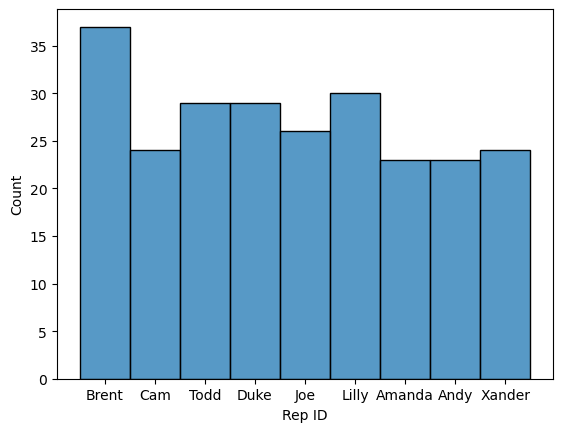

In [17]:
#Code Used
# Add Additional Cells as needed.
north_df.head(3)
#north_df["Calls"].value_counts() #this feature seems pretty redundant since they're all calls, so I will probably drop it

#Checking on the spread of calls to the Representatives (North)
hist_plot_north = sns.histplot(north_df['Rep ID'], kde=False, bins=10)


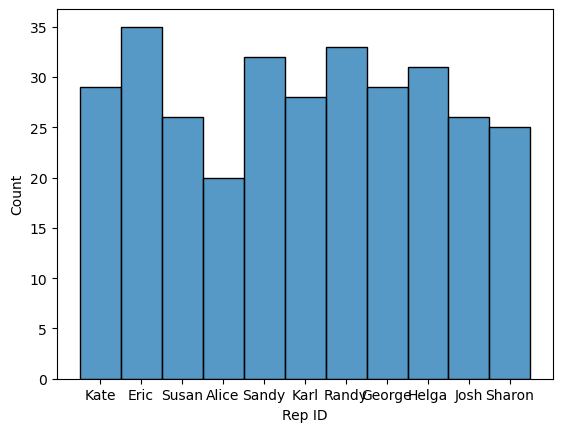

In [18]:
#Checking on the spread of calls to the Representatives (South)
hist_plot_south = sns.histplot(south_df['Rep ID'], kde=False, bins = 10)

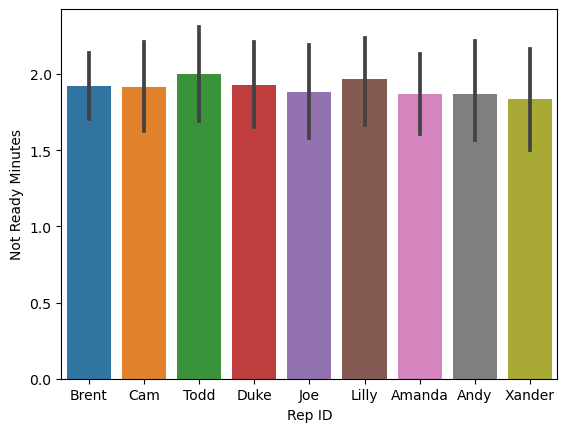

In [19]:
#Looking at Representatives Not Ready Minutes shows that the North seems to be pretty evenly spread, but the south has a problem
bar_NRM_reps_north = sns.barplot(x = 'Rep ID',y = 'Not Ready Minutes',data = north_df)

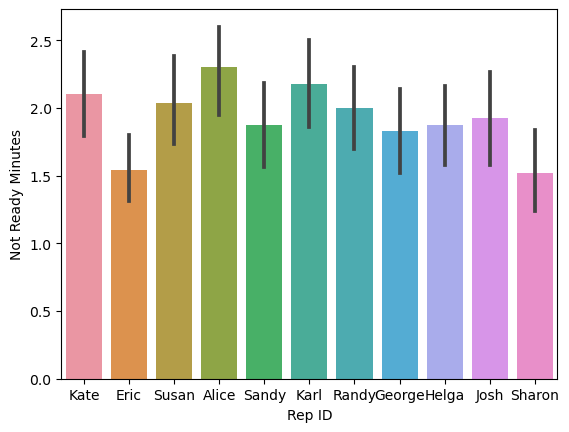

In [20]:
bar_NRM_reps_south = sns.barplot(x = 'Rep ID',y = 'Not Ready Minutes',data = south_df)

In [30]:
north_df["Branch"].value_counts()

North    245
Name: Branch, dtype: int64

In [31]:
south_df["Branch"].value_counts()

South    314
Name: Branch, dtype: int64

In [60]:
north_df.columns
#south_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

Text(0.5, 1.0, 'North Call Center')

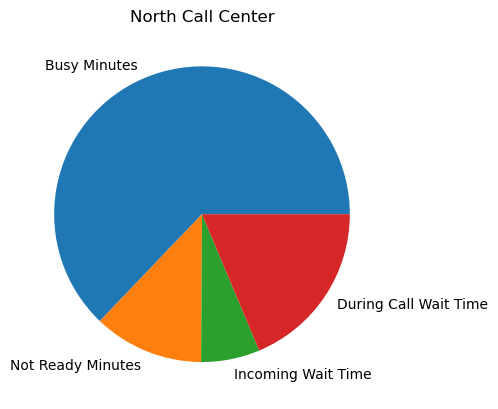

In [61]:
minutes_north = [north_df['Busy Minutes'].mean(), north_df['Not Ready Minutes'].mean(), north_df['Incoming Wait Time'].mean(), 
        north_df['During Call Wait Time'].mean()]
labels = ["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]
plt.pie(minutes_north, labels = labels)
plt.title("North Call Center")

Text(0.5, 1.0, 'South Call Center')

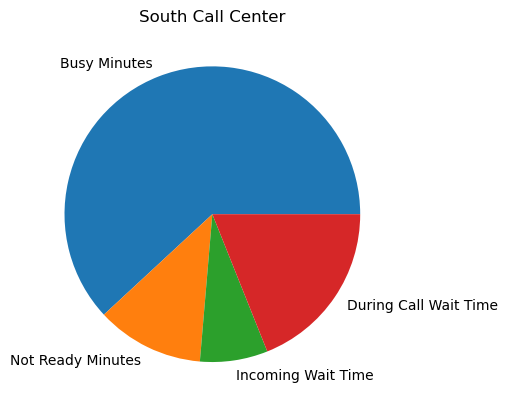

In [64]:
minutes_south = [south_df['Busy Minutes'].mean(), south_df['Not Ready Minutes'].mean(), south_df['Incoming Wait Time'].mean(), 
        south_df['During Call Wait Time'].mean()]
labels = ["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]
plt.pie(minutes_south, labels = labels)
plt.title("South Call Center")

In [65]:
#dropping Calls columns 
north_df_drop = north_df.drop(["Calls"], axis = 1)
north_df_drop.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time'],
      dtype='object')

In [66]:
#dropping Calls columns 
south_df_drop = south_df.drop(["Calls"], axis = 1)
south_df_drop.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time'],
      dtype='object')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [72]:
# Create dataframe for the entire company named df
df = pd.concat([north_df_drop, south_df_drop], ignore_index = True)
df.tail()
#df["Branch"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     559 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 61.3+ KB


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls


In [92]:
# Code Used
# Add Additional Cells as needed.
groupby_RepID = df.groupby("Branch")["Rep ID"]
groupby_RepID.value_counts()

Branch  Rep ID
North   Brent     37
        Lilly     30
        Duke      29
        Todd      29
        Joe       26
        Cam       24
        Xander    24
        Amanda    23
        Andy      23
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
        George    29
        Kate      29
        Karl      28
        Josh      26
        Susan     26
        Sharon    25
        Alice     20
Name: Rep ID, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 4.90%
- South Branch = 4.78%
- Company Wide = 4.83%
- Do any of these fall out of the optimal range of 2-5%? 
  Neither the North or South branch are outside of the 2-5% range, but both call centers are dangerously close to the 5% mark. 
  Therefore, it is probably wise to look more carefully at the efficiency of both centers.

In [168]:
# Code Used

#Sum of calls Lost or Abandoned per Branch
groupby_calls_lost_abandoned = df.groupby("Branch")[["Lost Call", "Abandoned"]].agg(["count", "sum"])
groupby_calls_lost_abandoned

Lost Call     Abandoned    
           count sum     count sum
Branch                            
North        245   5       245   7
South        314  11       314   4

In [171]:
#Whole Company Lost or Abandoned Calls
whole_df = df[["Lost Call","Abandoned"]].agg(["count", "sum"])
whole_df

,Lost Call,Abandoned
count,559,559
sum,16,11


In [161]:
#2-5% Optimum Calculation
pct_unhappy = df["Lost Call"].mean() + df["Abandoned"].mean()
pct_unhappy_grouped = groupby_calls_lost_abandoned.mean().sum(axis = 1) 
print(f"Whole Company (%): \n{round(pct_unhappy*100,2)} \nNorth and South Individually (%):\n{round(pct_unhappy_grouped*100,2)}")

Whole Company (%): 
4.83 
North and South Individually (%):
Branch
North    4.90
South    4.78
dtype: float64


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 
- South Branch = 
- Company Wide = 

In [24]:
# Code Used
# Add Additional Cells as needed.

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 
- South Branch in seconds = 
- Company Wide in seconds = 


In [25]:
# Code Used 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [26]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:




NameError: name 'df' is not defined

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: